# Object Detection

In [ ]:
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-1voc1jci
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-1voc1jci
  Resolved https://github.com/facebookresearch/detectron2.git to commit fd27788985af0f4ca800bca563acdb700bb890e2
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 43.7 MB/s eta 0:00:00
  Created wheel for detectron2: filename=detectron2-0.6-cp312-cp312-linux_x86_64.whl size=7085016 sha256=78c3cf5b72933028163890b5a7ec6d68f8be6880313239012e0491977c647be3
  Stored in directory: /tmp/pip-ephem-wheel-cache-azuv2b9a/wheels/d3/6e/bd/1969578f1456a6be

In [ ]:
!git clone https://github.com/facebookresearch/Detic.git --recurse-submodules
%cd Detic
!pip install -r requirements.txt

Cloning into 'Detic'...
remote: Enumerating objects: 210, done.
remote: Counting objects: 100% (111/111), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 210 (delta 59), reused 56 (delta 56), pack-reused 99 (from 1)
Receiving objects: 100% (210/210), 3.58 MiB | 8.98 MiB/s, done.
Resolving deltas: 100% (85/85), done.
Submodule 'third_party/CenterNet2' (https://github.com/xingyizhou/CenterNet2.git) registered for path 'third_party/CenterNet2'
Submodule 'third_party/Deformable-DETR' (https://github.com/fundamentalvision/Deformable-DETR.git) registered for path 'third_party/Deformable-DETR'
Cloning into '/content/Detic/third_party/CenterNet2'...
remote: Enumerating objects: 13925, done.        
remote: Counting objects: 100% (949/949), done.        
remote: Compressing objects: 100% (101/101), done.        
remote: Total 13925 (delta 887), reused 854 (delta 846), pack-reused 12976 (from 1)        
Receiving objects: 100% (13925/13925), 5.08 MiB | 11.19 MiB/s, done.
Res

In [ ]:
%cd /content/Detic

/content/Detic


In [ ]:
import torch
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

import sys
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

sys.path.insert(0, '/content/Detic/third_party/CenterNet2/')
from centernet.config import add_centernet_config
sys.path.insert(1, '/content/Detic')
from detic.config import add_detic_config
from detic.modeling.utils import reset_cls_test

/usr/local/lib/python3.12/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/usr/local/lib/python3.12/dist-packages/timm/models/helpers.py:7: FutureWarning: Importing from timm.models.helpers is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)
/usr/local/lib/python3.12/dist-packages/timm/models/registry.py:4: FutureWarning: Importing from timm.models.registry is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)


In [ ]:
cfg = get_cfg()
add_centernet_config(cfg)
add_detic_config(cfg)
cfg.merge_from_file("/content/Detic/configs/Detic_LCOCOI21k_CLIP_SwinB_896b32_4x_ft4x_max-size.yaml")
cfg.MODEL.WEIGHTS = 'https://dl.fbaipublicfiles.com/detic/Detic_LCOCOI21k_CLIP_SwinB_896b32_4x_ft4x_max-size.pth'
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.MODEL.ROI_BOX_HEAD.ZEROSHOT_WEIGHT_PATH = 'rand'
cfg.MODEL.ROI_HEADS.ONE_CLASS_PER_PROPOSAL = True
# cfg.MODEL.DEVICE='cpu'
predictor = DefaultPredictor(cfg)

/usr/local/lib/python3.12/dist-packages/torch/functional.py:505: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4317.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[11/23 00:22:41 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detic/Detic_LCOCOI21k_CLIP_SwinB_896b32_4x_ft4x_max-size.pth ...


Detic_LCOCOI21k_CLIP_SwinB_896b32_4x_ft4x_max-size.pth: 702MB [00:02, 296MB/s]                           


In [ ]:
BUILDIN_CLASSIFIER = {
    'lvis': 'datasets/metadata/lvis_v1_clip_a+cname.npy',
    'objects365': 'datasets/metadata/o365_clip_a+cnamefix.npy',
    'openimages': 'datasets/metadata/oid_clip_a+cname.npy',
    'coco': 'datasets/metadata/coco_clip_a+cname.npy',
}

BUILDIN_METADATA_PATH = {
    'lvis': 'lvis_v1_val',
    'objects365': 'objects365_v2_val',
    'openimages': 'oid_val_expanded',
    'coco': 'coco_2017_val',
}

vocabulary = 'lvis'
metadata = MetadataCatalog.get(BUILDIN_METADATA_PATH[vocabulary])
classifier = BUILDIN_CLASSIFIER[vocabulary]
num_classes = len(metadata.thing_classes)
reset_cls_test(predictor.model, classifier, num_classes)

Resetting zs_weight datasets/metadata/lvis_v1_clip_a+cname.npy


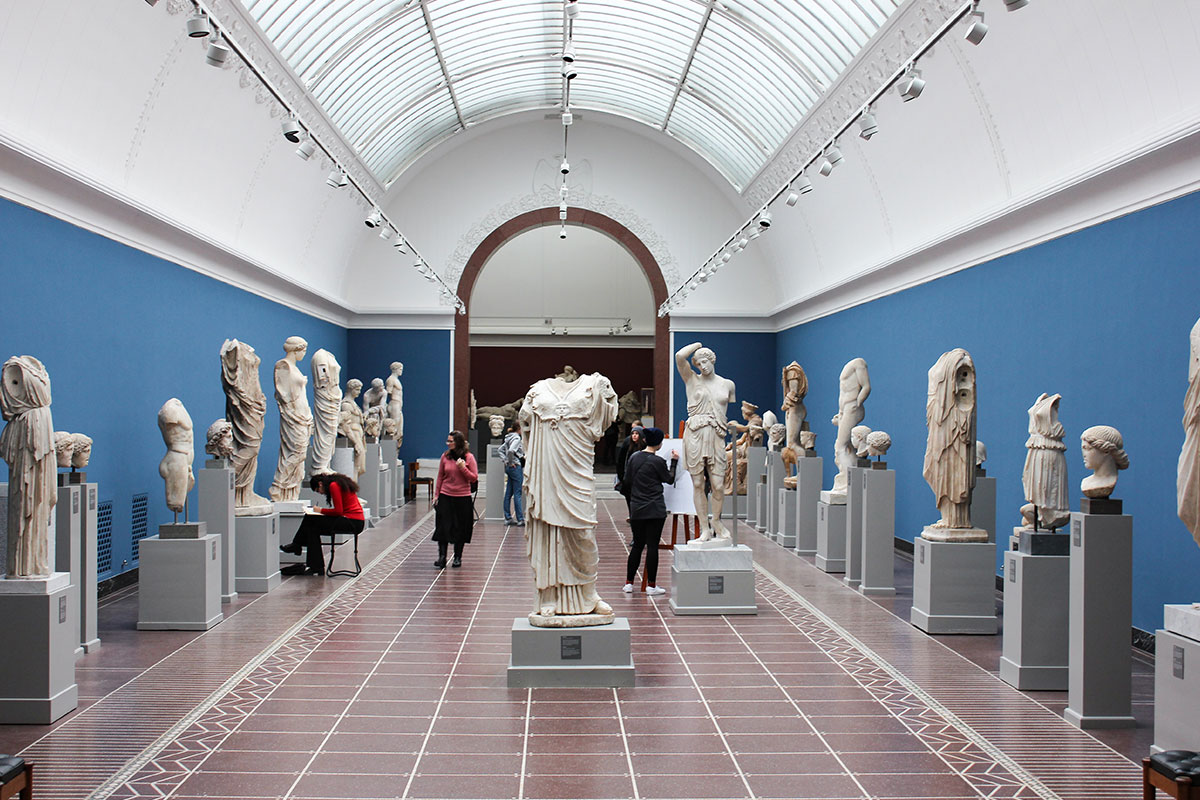

In [ ]:
!wget 'https://northernvirginiamag.com/wp-content/uploads/2020/03/statues-in-museums.jpg' -P /content/ -q
im = cv2.imread("/content/statues-in-museums.jpg")
cv2_imshow(im)

388


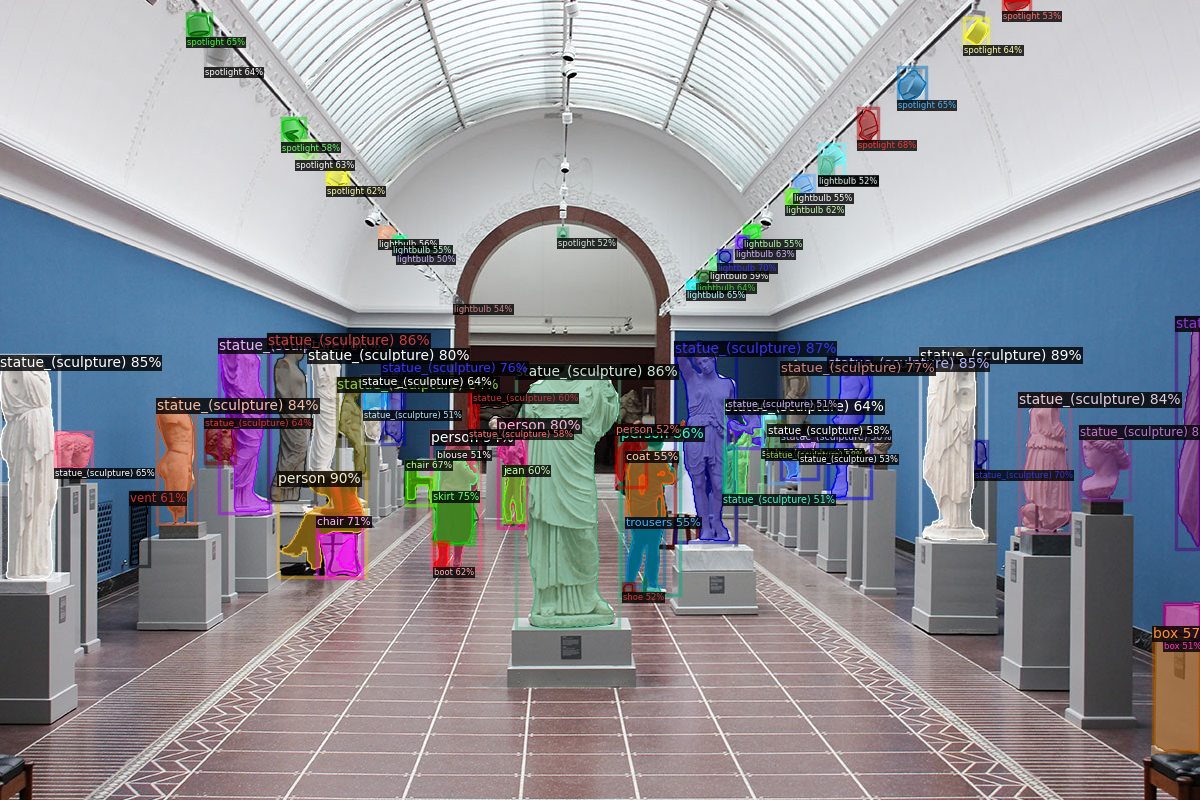

In [ ]:
import time
strt = int(round(time.time() * 1000))
outputs = predictor(im)
print(int(round(time.time() * 1000)) - strt)
v = Visualizer(im[:, :, ::-1], metadata)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

# Depth Estimation

In [ ]:
%cd /content

/content


In [ ]:
!pip install -q transformers

In [ ]:
from PIL import Image

image = Image.open("/content/statues-in-museums.jpg")

preprocessor_config.json:   0%|          | 0.00/442 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/149M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/149M [00:00<?, ?B/s]

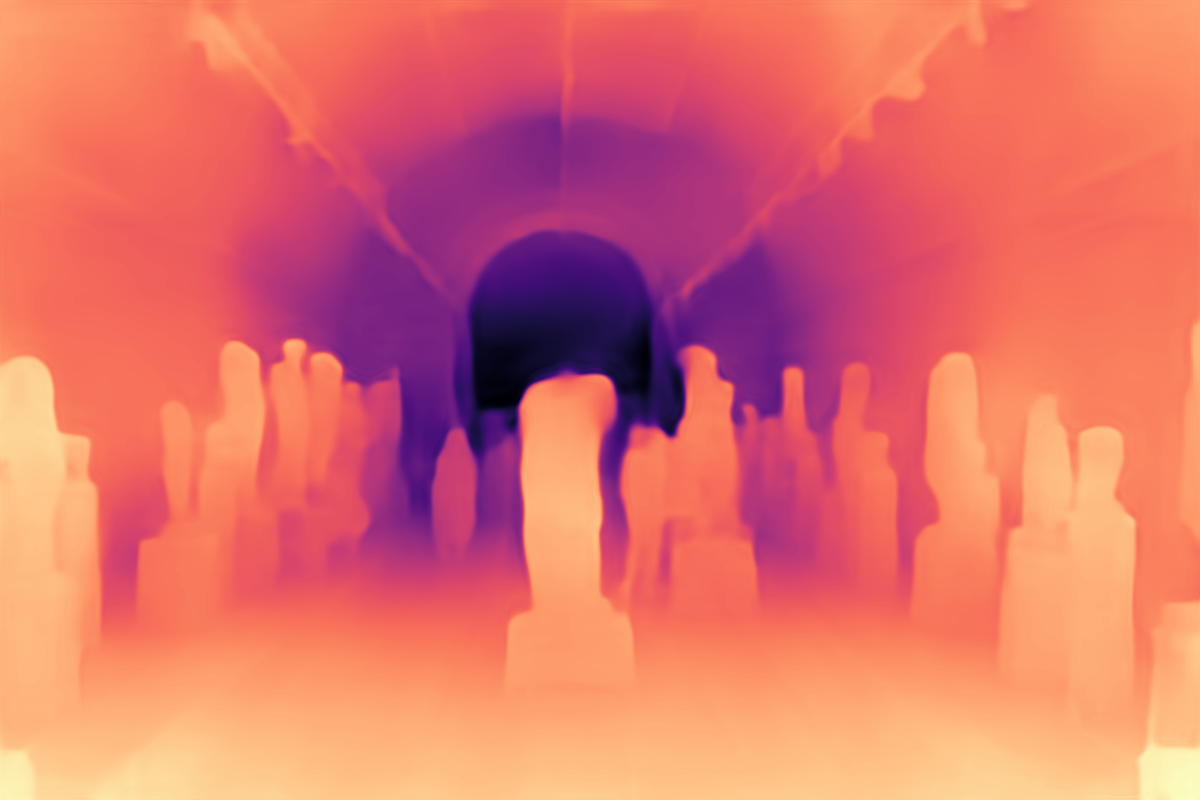

In [ ]:
from transformers import AutoImageProcessor, DPTForDepthEstimation, Dinov2Model
import torch
import numpy as np


image_processor = AutoImageProcessor.from_pretrained("facebook/dpt-dinov2-small-nyu", use_fast=True)
model = DPTForDepthEstimation.from_pretrained("facebook/dpt-dinov2-small-nyu")

inputs = image_processor(images=image, return_tensors="pt")

with torch.no_grad():
    outputs = model(**inputs)
    predicted_depth = outputs.predicted_depth

prediction = torch.nn.functional.interpolate(
    predicted_depth.unsqueeze(1),
    size=image.size[::-1],
    mode="bicubic",
    align_corners=False,
)

import matplotlib

def render_depth(values, colormap_name="magma_r") -> Image:
    min_value, max_value = values.min(), values.max()
    normalized_values = (values - min_value) / (max_value - min_value)

    colormap = matplotlib.colormaps[colormap_name]
    colors = colormap(normalized_values, bytes=True)
    colors = colors[:, :, :3]
    return Image.fromarray(colors)

depth_image = render_depth(prediction.squeeze().cpu())

display(depth_image)

# object detection + depth estimation

In [ ]:
def artwork_distance_mask(image):

    h, w = image.shape[:2]
    bbox_mask = np.zeros((h, w, 4), dtype=np.uint8)

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    pil_img = PIL.Image.fromarray(image_rgb)

    outputs = predictor(image)

    inputs = image_processor(images=pil_img, return_tensors="pt")

    with torch.no_grad():
        depth_result = model(**inputs)
        predicted_depth = depth_result.predicted_depth

    result = torch.nn.functional.interpolate(
        predicted_depth.unsqueeze(1),
        size=pil_img.size[::-1],
        mode="bicubic",
        align_corners=False,
    )

    result_min, result_max = result.min(), result.max()
    result_normalized = (result - result_min) / (result_max-result_min)
    result_normalized = result_normalized * 255

    for i in range(len(outputs['instances'])):
      if outputs['instances'].pred_classes[i] == 747 or outputs['instances'].pred_classes[i] == 1007:
        for (x,y,x2,y2) in outputs['instances'].pred_boxes[i]:
          mean_depth = int(torch.mean(result_normalized[0,0,int(y):int(y2),int(x):int(x2)]))
          bbox_mask = cv2.rectangle(bbox_mask,(int(x),int(y)),(int(x2),int(y2)),(255,255-mean_depth,0),2)

    bbox_mask[:,:,3] = (bbox_mask.max(axis = 2) > 0 ).astype(int) * 255

    return bbox_mask


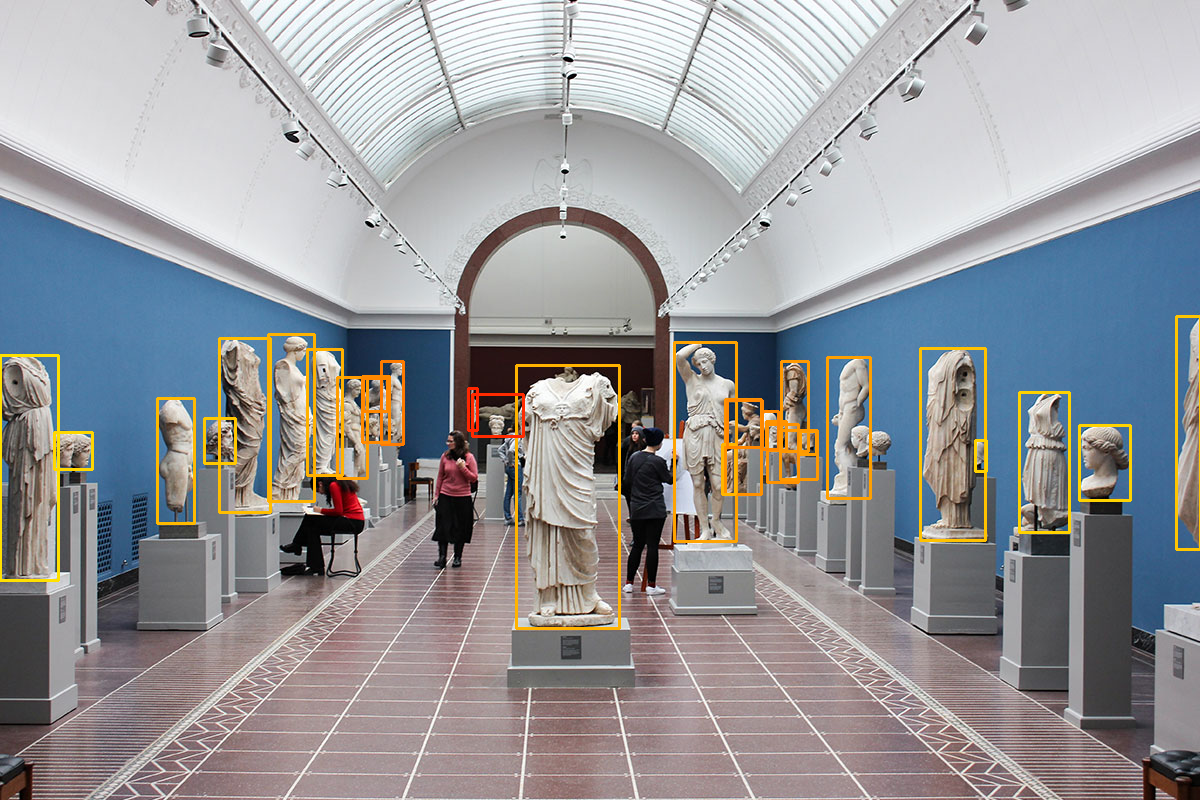

In [ ]:
image = cv2.imread("/content/statues-in-museums.jpg")

bbox_mask = artwork_distance_mask(image)

bbox_mask = cv2.cvtColor(bbox_mask, cv2.COLOR_RGBA2BGRA)

overlay_bgr = bbox_mask[:, :, :3].astype(float)
alpha = bbox_mask[:, :, 3].astype(float) / 255.0

alpha = alpha[..., None]

image_float = image.astype(float)

overlayed_image = alpha * overlay_bgr + (1 - alpha) * image_float

overlayed_image = overlayed_image.astype(np.uint8)

cv2_imshow(overlayed_image)

# Live Test

In [ ]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [ ]:
def js_to_image(js_reply):
  image_bytes = b64decode(js_reply.split(',')[1])
  jpg_as_np_array = np.frombuffer(image_bytes, dtype=np.uint8)
  img = cv2.imdecode(jpg_as_np_array, flags=1)
  return img


def bbox_to_bytes(bbox_array):
  bbox_PIL = PIL.Image.fromarray(bbox_array)
  iobuf = io.BytesIO()
  bbox_PIL.save(iobuf, format='png')
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
import random
import threading


video_stream()

label_html = 'Capturing...'

global bbox_list
bbox_list = []
bbox_list.append('')

global frames_list
frames_list = []

js_reply = video_frame(label_html, bbox_list[len(bbox_list)-1])
img = js_to_image(js_reply["img"])
frames_list.append(img)

def process_frame():
    while not stop_event.is_set():

        last_used = len(frames_list)

        in_process = frames_list[0:last_used]
        img_ind = random.randint(0,max(0,len(in_process)-1))
        try:
            selected_frame = in_process[last_used-1]
        except IndexError:
            continue

        bbox_mask = artwork_distance_mask(selected_frame)

        bbox_bytes = bbox_to_bytes(bbox_mask)

        bbox_list.append(bbox_bytes)

        del frames_list[0:last_used]

    print("process_fr stopped cleanly")

stop_event = threading.Event()

t1=threading.Thread(target=process_frame)
t1.start()

try:
    while t1.is_alive():
        js_reply = video_frame(label_html, bbox_list[len(bbox_list)-1])
        if not js_reply:
            break

        img = js_to_image(js_reply["img"])

        frames_list.append(img)


except KeyboardInterrupt:
    print("Interrupted: asking thread to stop...")
    stop_event.set()
    t1.join()
    print("Thread terminated")